# Importing Librarie

In [2]:
import re
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models

# Read the dataset

In [3]:
df = pd.read_csv('df_m.csv')
pd.set_option('display.max_colwidth', 0)

# Download NLTK data

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Data Cleaning

In [7]:
df['text'] = df['text'].apply(lambda text: text.lower())
df['text'] = df['text'].apply(lambda text: re.sub(r'http\S+', '', text))      # Remove URLs
df['text'] = df['text'].apply(lambda text: re.sub(r'@\w+', '', text))         # Remove mentions
df['text'] = df['text'].apply(lambda text: re.sub(r'#\w+', '', text))         # Remove hashtags
df['text'] = df['text'].apply(lambda text: re.sub(r'[^a-zA-Z\s]', '', text))  # Remove special characters
df['text'] = df['text'].apply(lambda text: re.sub(r'\n', ' ', text))

# Tabular form after cleaning

In [8]:
print("Tabular form after cleaning (lowercasing, removing URLs, and special characters):")
print(df[['text']].head())

Tabular form after cleaning (lowercasing, removing URLs, and special characters):
                                                                                                                                                                                                                                                                     text
0   reports   attacks have dropped drastically in  with  of its ddostargeted clients reporting an  in jan  in feb and  in mar                                                                                                                                            
1  heres the one thing you mustnt tell hackers if your business is successfully hit with a ransomware attack where they lock your data and demand a ransom fee                                                                                                           
2   there was the time where a notsogreatattheirjob server admin restored a companywide file server after ransomware enc

# Visualization after cleaning

In [9]:
all_words_cleaning = ' '.join(df['text'])
word_freq_cleaning = nltk.FreqDist(all_words_cleaning.split())
top_words_cleaning = pd.DataFrame(word_freq_cleaning.most_common(20), columns=['Word', 'Frequency'])

# Barplot after Cleaning

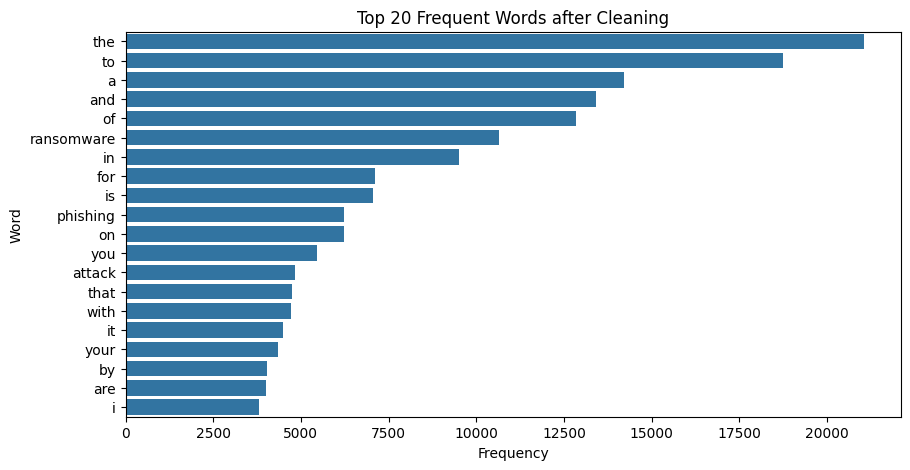

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Word', data=top_words_cleaning)
plt.title(f'Top 20 Frequent Words after Cleaning')
plt.show()

# Wordcloud after cleaning (Top 20 Frequent Words)

# Tokenization

In [11]:
df['tokenized_text'] = df['text'].apply(nltk.word_tokenize)

# Tabular form after tokenization

In [12]:
print("\nTabular form after tokenization:")
print(df[['text', 'tokenized_text']].head())


Tabular form after tokenization:
                                                                                                                                                                                                                                                                     text  \
0   reports   attacks have dropped drastically in  with  of its ddostargeted clients reporting an  in jan  in feb and  in mar                                                                                                                                               
1  heres the one thing you mustnt tell hackers if your business is successfully hit with a ransomware attack where they lock your data and demand a ransom fee                                                                                                              
2   there was the time where a notsogreatattheirjob server admin restored a companywide file server after ransomware encrypted it but restored it with everyone

# Stopwords removal


In [24]:
stop_words = set(stopwords.words('english'))
df['filtered_tokens'] = df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])

# Remove words with length <= 2 (like 'u') and other insignificant tokens
df['filtered_tokens'] = df['filtered_tokens'].apply(lambda x: [word for word in x if len(word) > 2])
# Create a custom list of words to filter out

custom_stopwords = {'amp', 'u', 'via', 'rt', 'th', 'ht', 'dm'}  # Add more as you discover them
df['filtered_tokens'] = df['filtered_tokens'].apply(lambda x: [word for word in x if word not in custom_stopwords])


# Flatten tokens for visualization after stopword removal

In [25]:
df['filtered_tokens_str'] = df['filtered_tokens'].apply(lambda x: ' '.join(x))
all_words_stopwords = ' '.join(df['filtered_tokens_str'])
word_freq_stopwords = nltk.FreqDist(all_words_stopwords.split())
top_words_stopwords = pd.DataFrame(word_freq_stopwords.most_common(20), columns=['Word', 'Frequency'])

# Barplot after stopwords removal

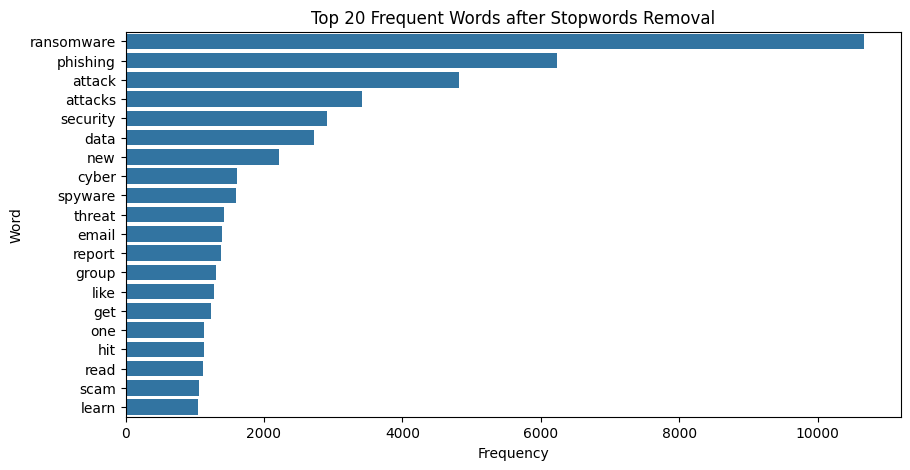

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Word', data=top_words_stopwords)
plt.title(f'Top 20 Frequent Words after Stopwords Removal')
plt.show()

# Word Cloud after stopwords removal (Top 20 Frequent Words)

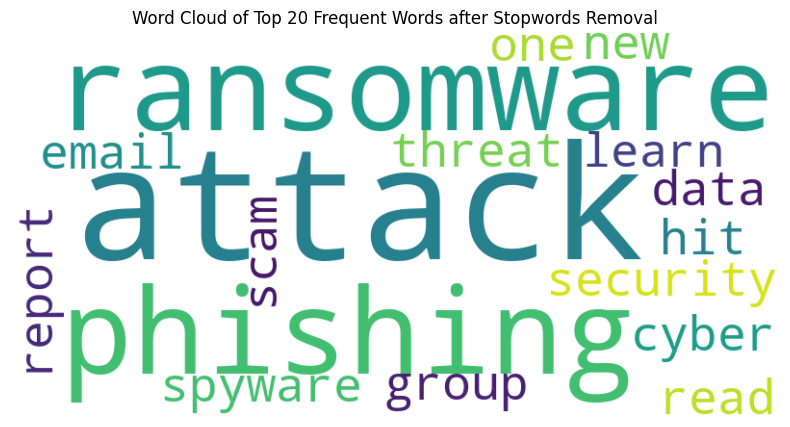

In [28]:
top_words_stopwords_list = ' '.join(top_words_stopwords['Word'])
wordcloud_stopwords = WordCloud(width=800, height=400, background_color='white').generate(top_words_stopwords_list)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_stopwords, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud of Top 20 Frequent Words after Stopwords Removal')
plt.show()

# Lemmatization

In [29]:
lemmatizer = WordNetLemmatizer()
df['lemmatized_text'] = df['filtered_tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [30]:
df['lemmatized_text_str'] = df['lemmatized_text'].apply(lambda x: ' '.join(x))
all_words_lemmatization = ' '.join(df['lemmatized_text_str'])
word_freq_lemmatization = nltk.FreqDist(all_words_lemmatization.split())
top_words_lemmatization = pd.DataFrame(word_freq_lemmatization.most_common(20), columns=['Word', 'Frequency'])


# Barplot after lemmatization

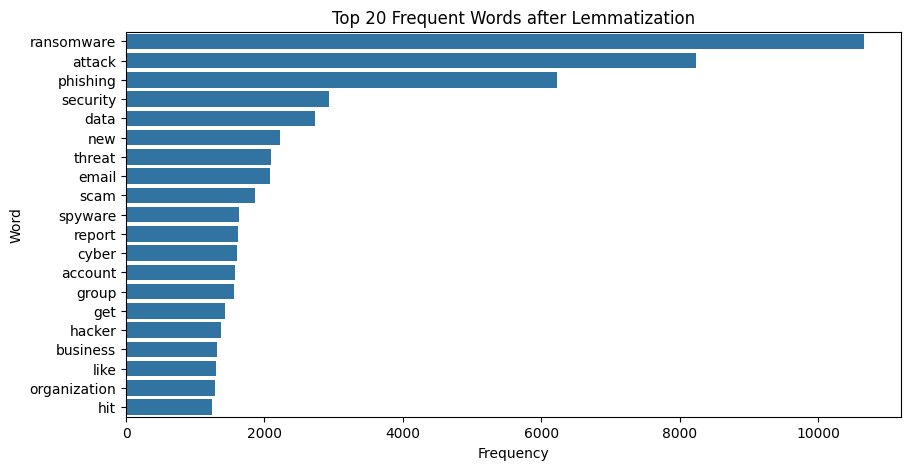

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Word', data=top_words_lemmatization)
plt.title(f'Top 20 Frequent Words after Lemmatization')
plt.show()

# Word Cloud after lemmatization (Top 20 Frequent Words)

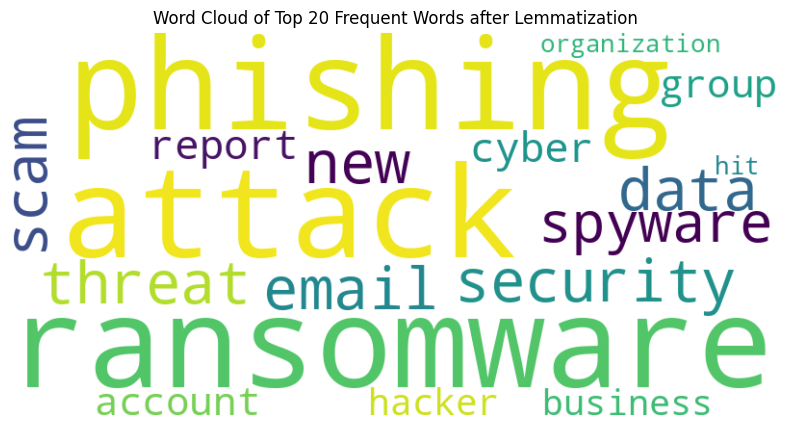

In [32]:
top_words_lemmatization_list = ' '.join(top_words_lemmatization['Word'])
wordcloud_lemmatization = WordCloud(width=800, height=400, background_color='white').generate(top_words_lemmatization_list)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_lemmatization, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud of Top 20 Frequent Words after Lemmatization')
plt.show()

# **TF_IDF**

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
df['lemmatized_text'] = df['lemmatized_text'].apply(lambda x: ' '.join(x))

TF-IDF Vectorization after *lemmatization*

In [35]:
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Limit to top 500 features (adjust as necessary)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized_text'])

Convert TF-IDF matrix to DataFrame

In [36]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Print TF-IDF matrix as table

In [37]:
print("TF-IDF Matrix:")
print(tfidf_df.head())

TF-IDF Matrix:
   able  access  according  account    across  action  activity  actor  \
0  0.0   0.0     0.0        0.0      0.000000  0.0     0.0       0.0     
1  0.0   0.0     0.0        0.0      0.000000  0.0     0.0       0.0     
2  0.0   0.0     0.0        0.0      0.000000  0.0     0.0       0.0     
3  0.0   0.0     0.0        0.0      0.431528  0.0     0.0       0.0     
4  0.0   0.0     0.0        0.0      0.000000  0.0     0.0       0.0     

   actually  add  ...  working  world  worm  worth  would  year     youre  \
0  0.0       0.0  ...  0.0      0.0    0.0   0.0    0.0    0.0   0.000000   
1  0.0       0.0  ...  0.0      0.0    0.0   0.0    0.0    0.0   0.000000   
2  0.0       0.0  ...  0.0      0.0    0.0   0.0    0.0    0.0   0.000000   
3  0.0       0.0  ...  0.0      0.0    0.0   0.0    0.0    0.0   0.389007   
4  0.0       0.0  ...  0.0      0.0    0.0   0.0    0.0    0.0   0.000000   

   youve  zero  zeroday  
0  0.0    0.0   0.0      
1  0.0    0.0   0.0      

# **NEURAL NETWORKS**

# Encode the labels

In [38]:
label_encoder = LabelEncoder()
y = df['majority']  # Replace 'label' with your actual label column name
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split data into train and test sets

In [39]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y_categorical, test_size=0.2, random_state=1)

# ------ 1. Feedforward Neural Network (FNN) ------

In [40]:
fnn_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(y_train.shape[1], activation='softmax')
])

fnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_fnn = fnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8928 - loss: 0.3837 - val_accuracy: 0.9569 - val_loss: 0.1293
Epoch 2/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9595 - loss: 0.1164 - val_accuracy: 0.9594 - val_loss: 0.1186
Epoch 3/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9697 - loss: 0.0882 - val_accuracy: 0.9624 - val_loss: 0.1164
Epoch 4/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9766 - loss: 0.0663 - val_accuracy: 0.9641 - val_loss: 0.1176
Epoch 5/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9817 - loss: 0.0531 - val_accuracy: 0.9619 - val_loss: 0.1223
Epoch 6/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9847 - loss: 0.0448 - val_accuracy: 0.9631 - val_loss: 0.1335
Epoch 7/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9869 - loss: 0.0372 - val_accuracy: 0.9626 - val_loss: 0.1367
Epoch 8/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9886 - loss: 0.0318 - val_accuracy: 0.

# Plot FNN Accuracy Curve

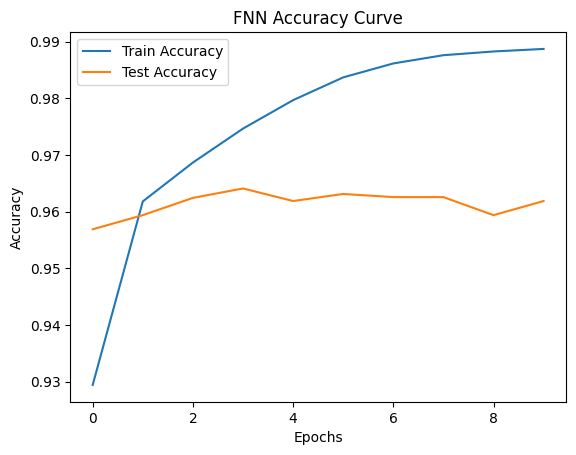

In [41]:
plt.plot(history_fnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_fnn.history['val_accuracy'], label='Test Accuracy')
plt.title('FNN Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ------ 2. LSTM Network ------
# Reshape input for LSTM (LSTM requires 3D input)

In [42]:
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

lstm_model = models.Sequential([
    layers.LSTM(128, input_shape=(1, X_train.shape[1])),
    layers.Dense(64, activation='relu'),
    layers.Dense(y_train.shape[1], activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_lstm = lstm_model.fit(X_train_reshaped, y_train, epochs=10, validation_data=(X_test_reshaped, y_test), batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8855 - loss: 0.4486 - val_accuracy: 0.9508 - val_loss: 0.1397
Epoch 2/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9551 - loss: 0.1253 - val_accuracy: 0.9555 - val_loss: 0.1312
Epoch 3/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9590 - loss: 0.1109 - val_accuracy: 0.9540 - val_loss: 0.1321
Epoch 4/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9603 - loss: 0.1084 - val_accuracy: 0.9577 - val_loss: 0.1263
Epoch 5/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9633 - loss: 0.1009 - val_accuracy: 0.9573 - val_loss: 0.1250
Epoch 6/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9639 - loss: 0.0941 - val_accuracy: 0.9583 - val_loss: 0.1251
Epoch 7/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9689 - loss: 0.0862 - val_accuracy: 0.9606 - val_loss: 0.1247
Epoch 8/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9685 - loss: 0.0814 - val_accuracy:

# Plot LSTM Accuracy Curve

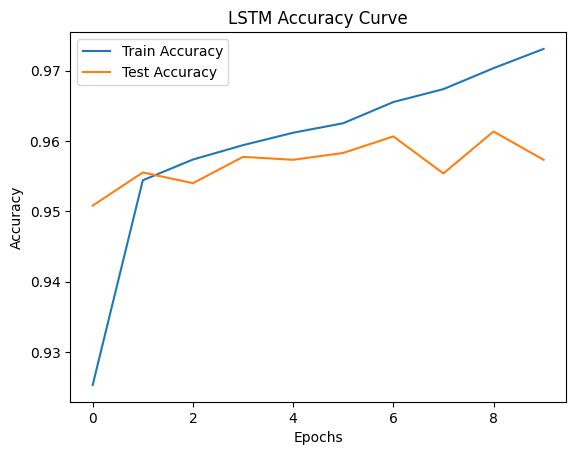

In [43]:
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Test Accuracy')
plt.title('LSTM Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ------ 3. Bidirectional LSTM Network ------

In [ ]:
bilstm_model = models.Sequential([
    layers.Bidirectional(layers.LSTM(128), input_shape=(1, X_train.shape[1])),
    layers.Dense(64, activation='relu'),
    layers.Dense(y_train.shape[1], activation='softmax')
])

bilstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_bilstm = bilstm_model.fit(X_train_reshaped, y_train, epochs=10, validation_data=(X_test_reshaped, y_test), batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.8998 - loss: 0.3912 - val_accuracy: 0.9527 - val_loss: 0.1367
Epoch 2/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9542 - loss: 0.1255 - val_accuracy: 0.9541 - val_loss: 0.1320
Epoch 3/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9576 - loss: 0.1155 - val_accuracy: 0.9554 - val_loss: 0.1306
Epoch 4/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9615 - loss: 0.1024 - val_accuracy: 0.9569 - val_loss: 0.1260
Epoch 5/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9608 - loss: 0.0998 - val_accuracy: 0.9554 - val_loss: 0.1315
Epoch 6/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9673 - loss: 0.0850 - val_accuracy: 0.9584 - val_loss: 0.1232
Epoch 7/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9676 - loss: 0.0822 - val_accuracy: 0.9586 - val_loss: 0.1303
Epoch 8/10
902/902 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9730 - loss: 0.0726 - 

# Plot BiLSTM Accuracy Curve

In [ ]:
plt.plot(history_bilstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_bilstm.history['val_accuracy'], label='Test Accuracy')
plt.title('BiLSTM Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ------ 4. Model Comparison ------

In [ ]:
plt.plot(history_fnn.history['val_accuracy'], label='FNN Test Accuracy', linestyle='--')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Test Accuracy', linestyle='--')
plt.plot(history_bilstm.history['val_accuracy'], label='BiLSTM Test Accuracy', linestyle='--')

plt.title('Model Comparison - Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()